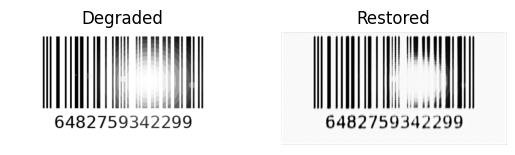

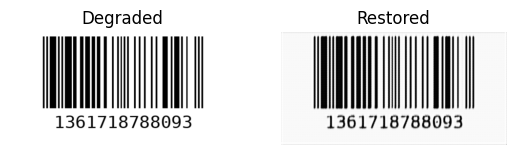

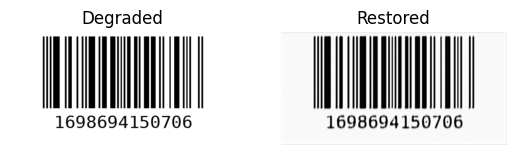

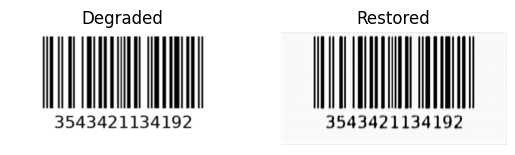

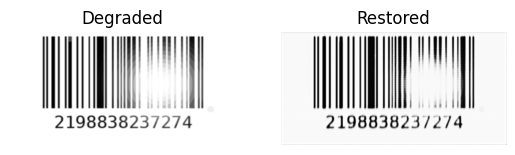

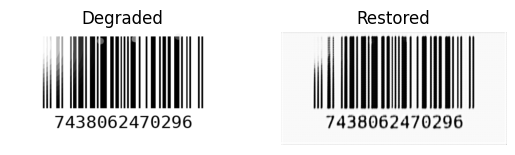

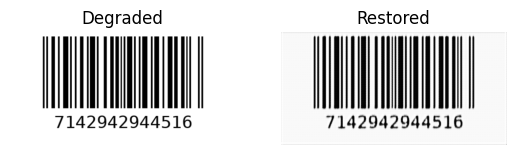

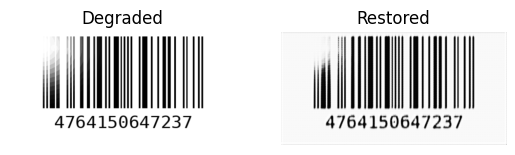

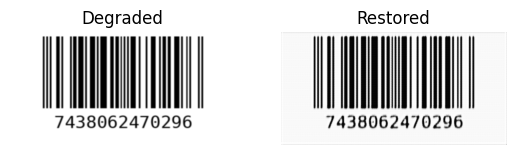

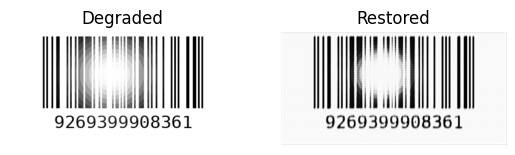

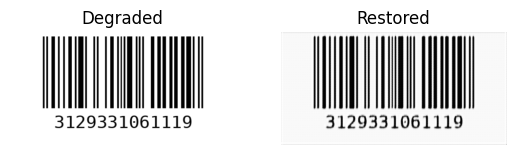

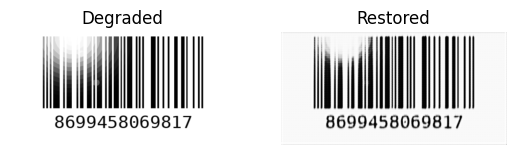

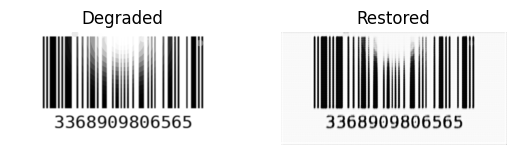

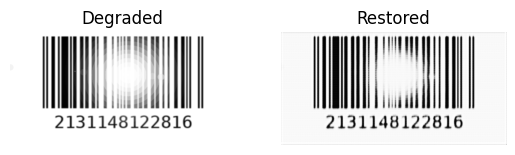

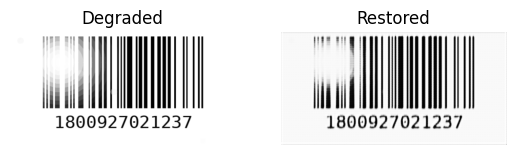

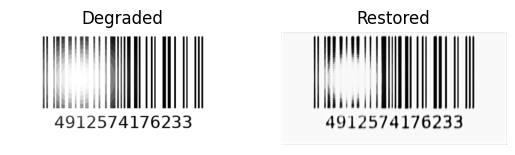

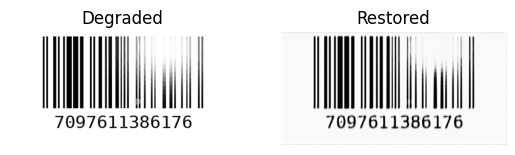

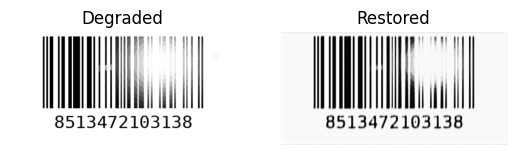

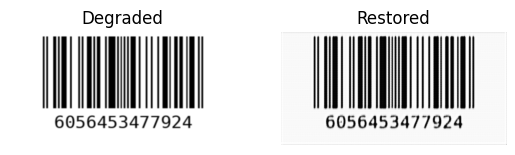

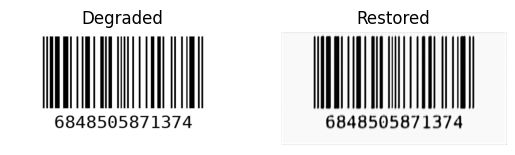

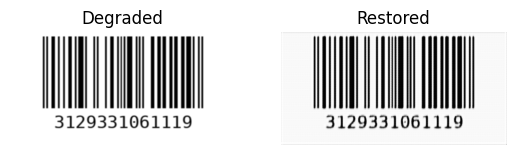

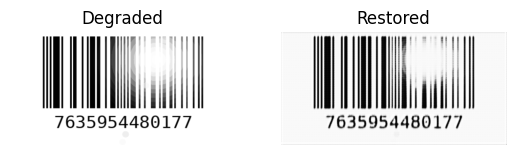

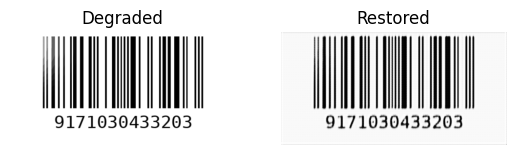

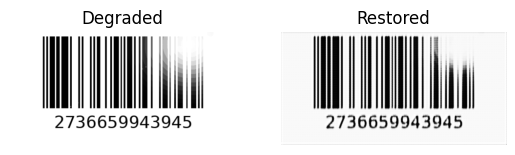

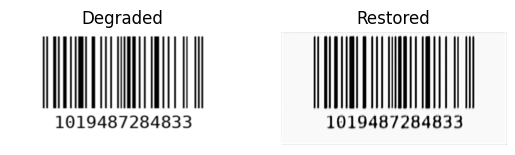

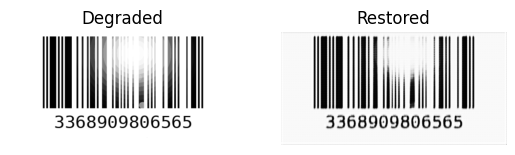

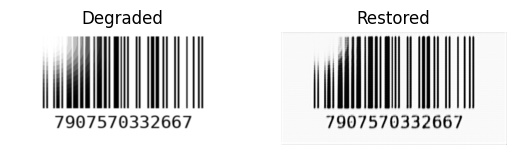

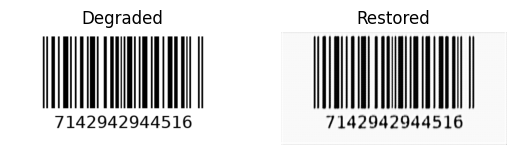

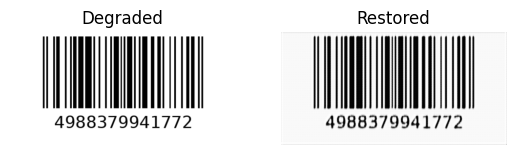

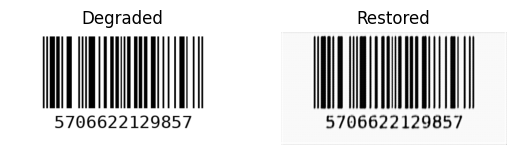

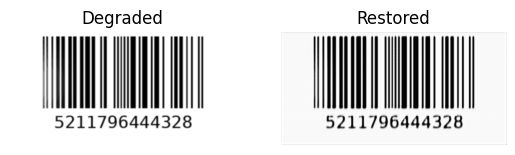

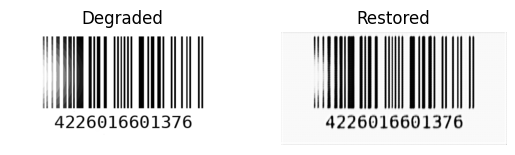

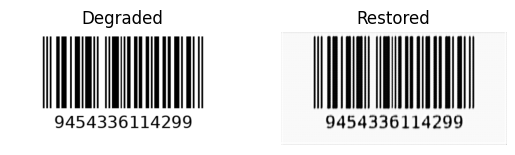

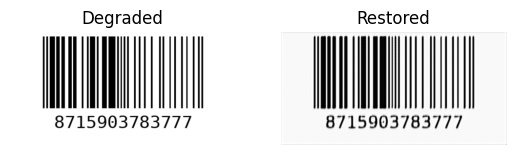

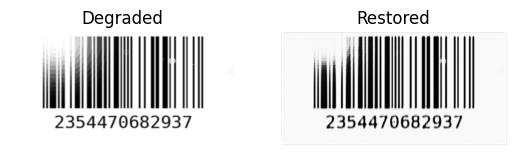

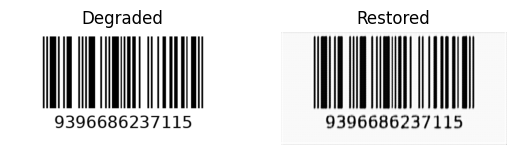

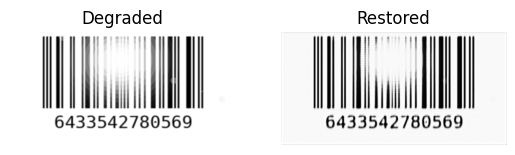

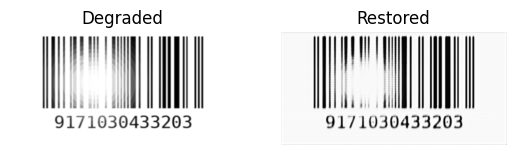

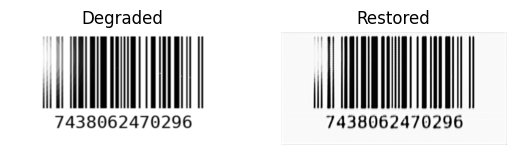

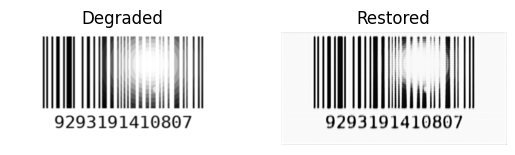

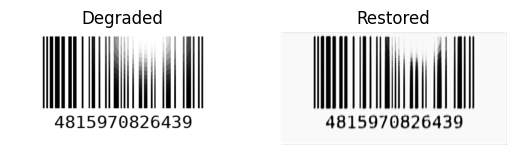

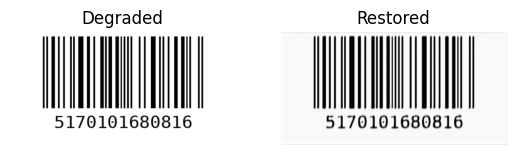

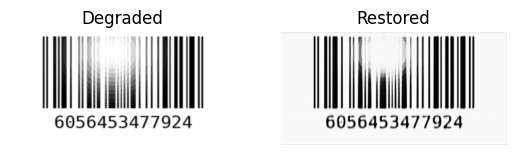

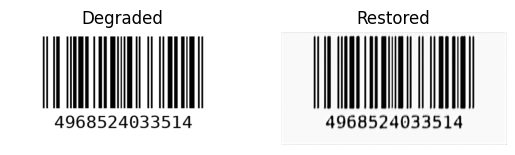

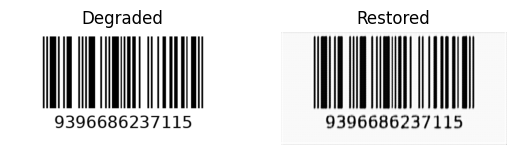

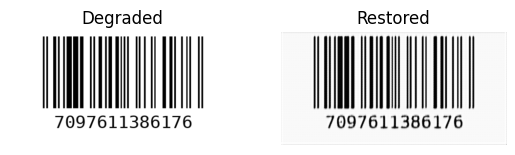

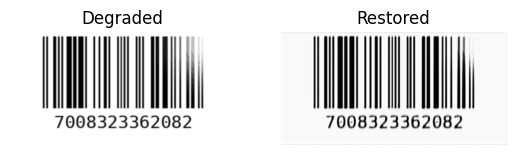

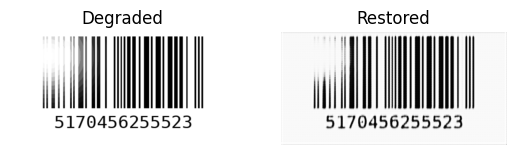

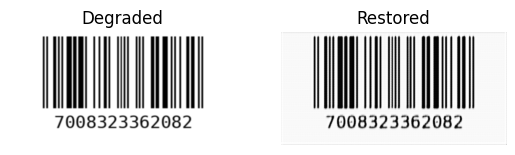

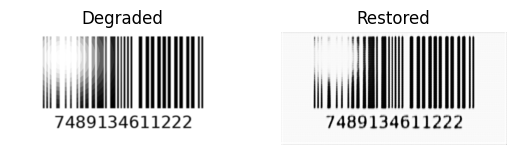

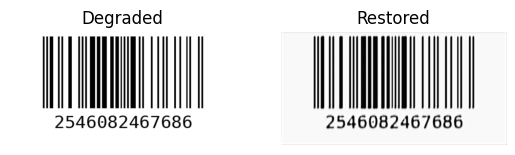

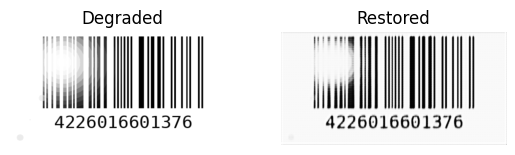

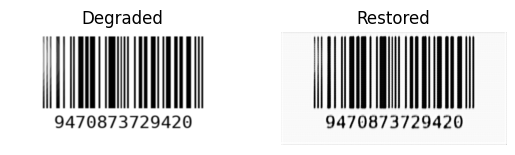

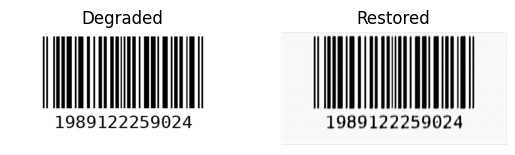

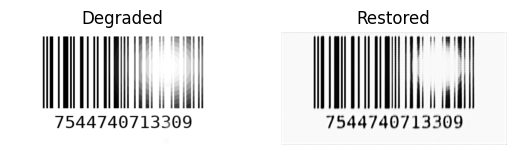

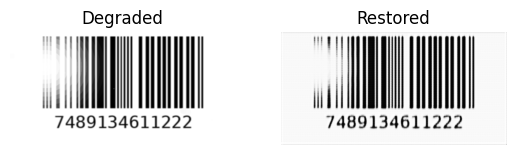

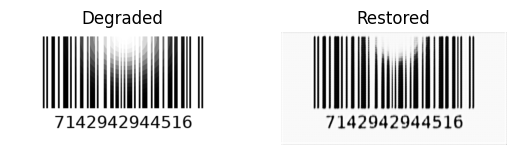

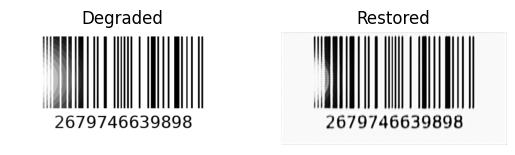

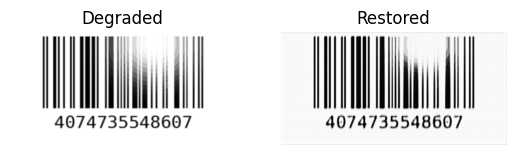

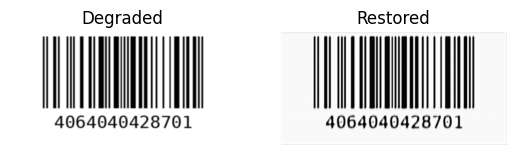

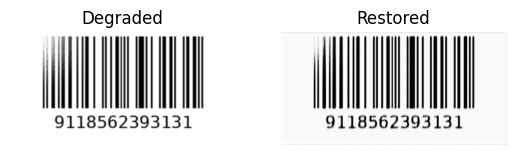

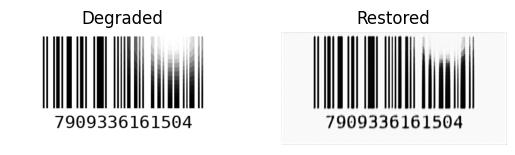

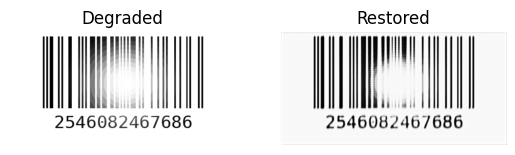

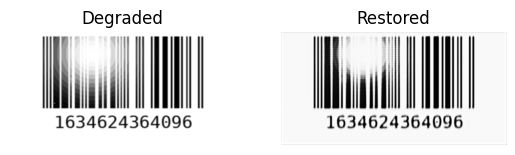

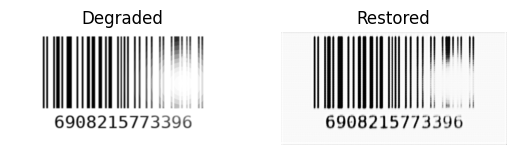

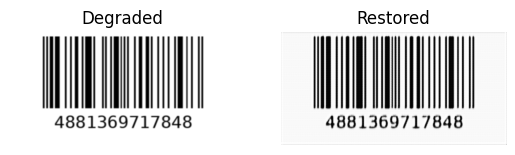

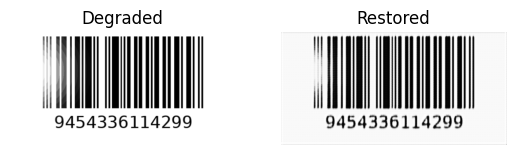

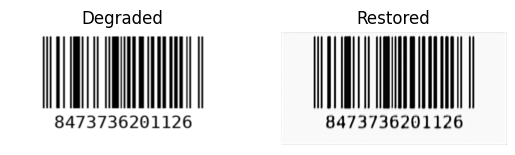

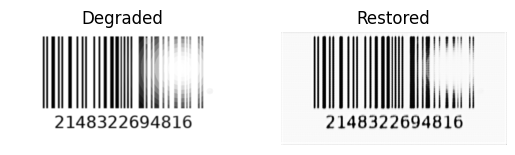

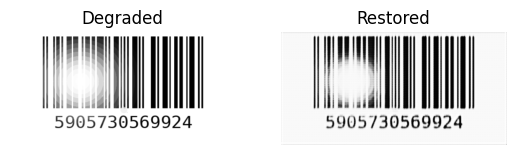

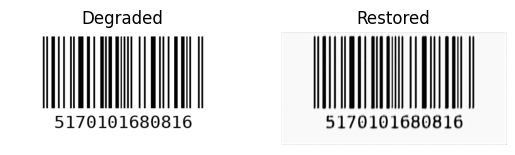

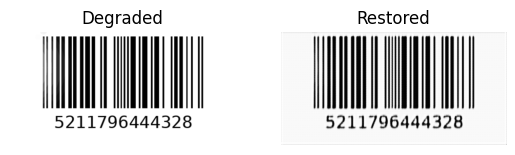

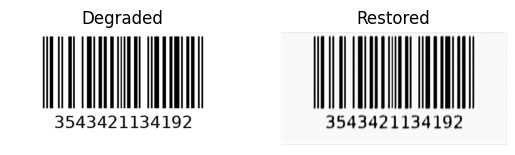

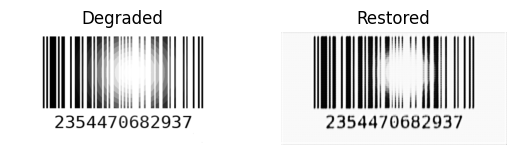

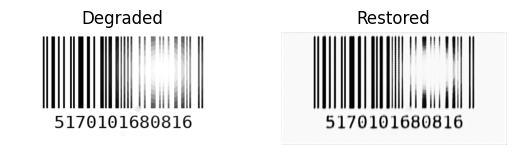

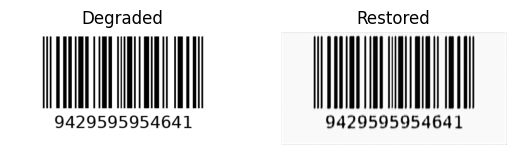

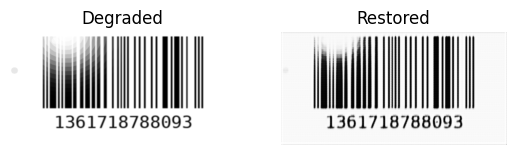

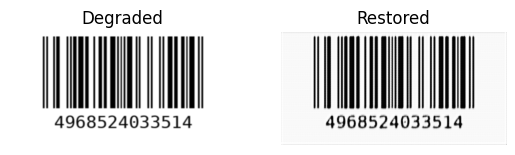

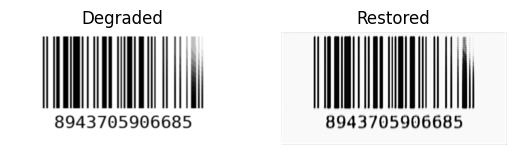

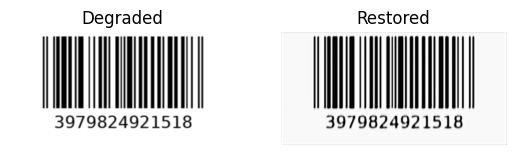

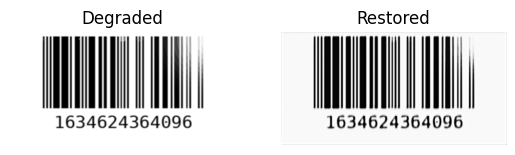

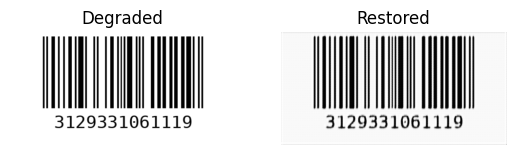

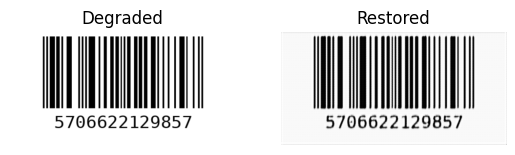

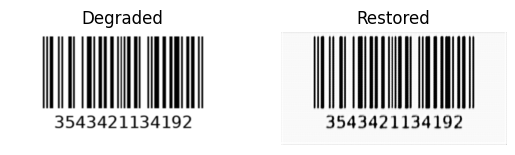

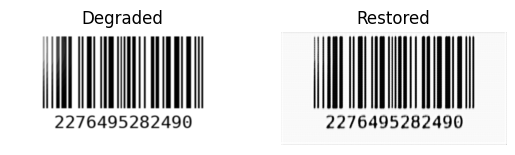

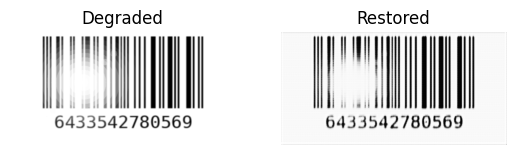

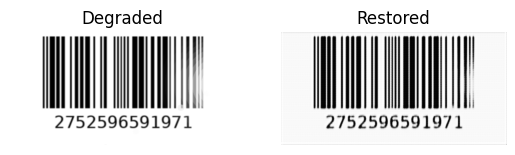

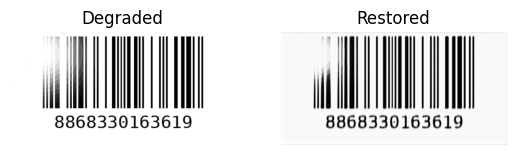

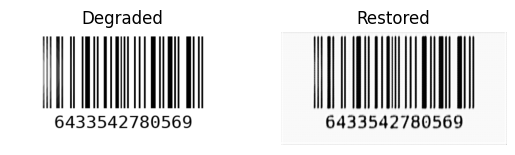

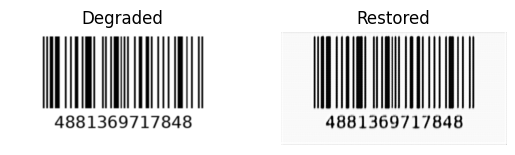

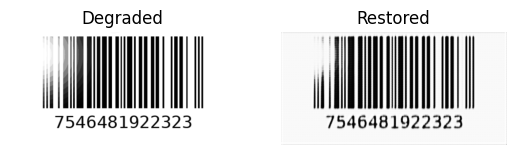

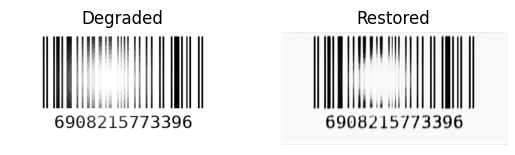

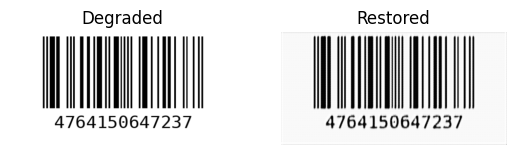

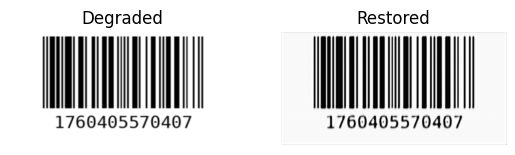

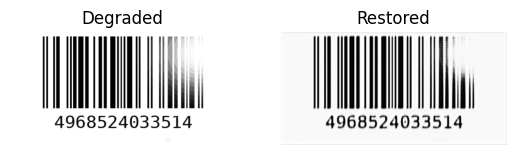

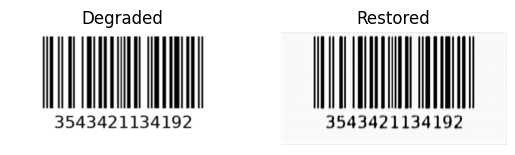

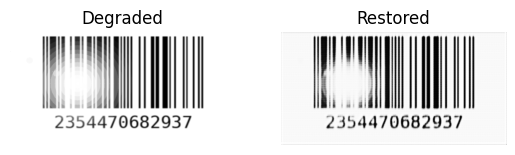

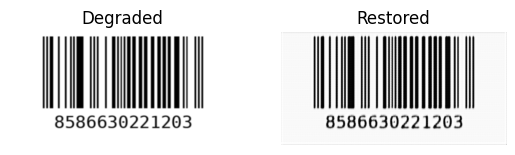

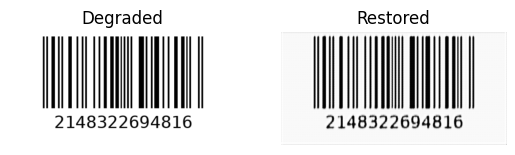

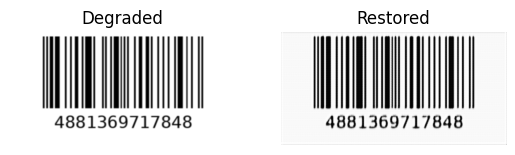

In [15]:
import torch
import torch
from PIL import Image
from torchvision import transforms
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from model import Autoencoder
import time
import os

model = Autoencoder()

model.load_state_dict(torch.load('model.pth'))


# Ensure the model is in evaluation mode
model.eval()

def imshow(img):
    img = img.numpy() # Convert tensor to numpy array
    plt.imshow(np.transpose(img, (1, 2, 0))) # Convert from CxHxW to HxWxC
    plt.show()

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((256, 512)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to a tensor
])
 
# Get the list of files in the directory
files = os.listdir('data/tmp/degraded')

# Process only the first 100 files
for file in files[:100]:
    # Load the image
    image = Image.open(os.path.join('data/tmp/degraded', file)).convert('L')
    

    # Apply the transformation to the image and add an extra dimension
    input_tensor = transform(image).unsqueeze(0)

    # Run inference
    with torch.no_grad():
        output = model(input_tensor)

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(input_tensor[0].numpy().transpose(1, 2, 0), cmap='gray')
    ax[0].set_title('Degraded')
    ax[0].axis('off')
    ax[1].imshow(output[0].numpy().transpose(1, 2, 0), cmap='gray')
    ax[1].set_title('Restored')
    ax[1].axis('off')

    plt.show()
    





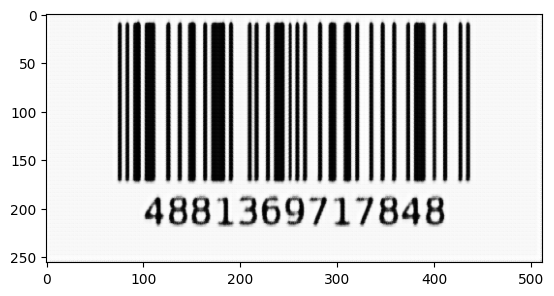

In [16]:
def imshow(img):
    img = img.numpy() # Convert tensor to numpy array
    plt.imshow(np.transpose(img, (1, 2, 0))) # Convert from CxHxW to HxWxC
    plt.show()

imshow(torchvision.utils.make_grid(output[0].unsqueeze(0)))